aa 170


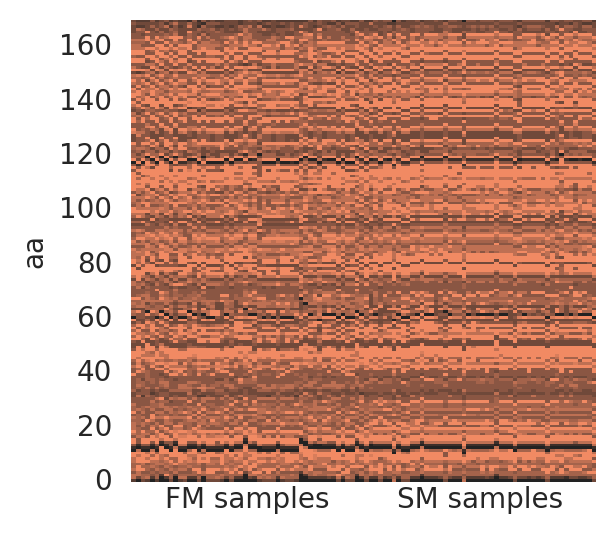

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import src.colorscheme as color
import pandas as pd
from pathlib import Path

PROTEIN_CLS = "RAS"

aa = 0
conserve_grades = []
for csv in sorted(Path(f"../../data/{PROTEIN_CLS}/generated/C/").glob("*.csv")):
    df = pd.read_csv(csv)
    aa = df.shape[0]
    conserve_grades.append(df["COLOR"].values)
print("aa", aa)
conserve_grades = np.column_stack(conserve_grades)

fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
sns.heatmap(conserve_grades,
            cbar=False,
            cmap=mcolors.LinearSegmentedColormap.from_list("cmap", ["#222222", color.CS_FG_A]))
# cmap=mcolors.LinearSegmentedColormap.from_list("cmap", [color.CS_FG_B, "white", color.CS_FG_A]))
ax.text(0.25, -0.07, 'FM samples', transform=ax.transAxes, ha='center', va='bottom')
ax.text(0.75, -0.07, 'SM samples', transform=ax.transAxes, ha='center', va='bottom')
plt.xticks(ticks=np.arange(0, 100, 50))
plt.yticks(ticks=np.arange(0, aa, 20), labels=[f'{i}' for i in range(0, aa, 20)])
plt.gca().invert_yaxis()
plt.ylabel('aa')
plt.show()

In [22]:
from Bio import AlignIO
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import src.colorscheme as color

alignment = AlignIO.read("wd/RAS.fasta", "fasta")
num_cols = alignment.get_alignment_length()
identity_scores = []

print(num_cols)
for i in range(num_cols):
    column = alignment[:, i]
    pairs = [(a, b) for a, b in itertools.combinations(column, 2) if a != '-' and b != '-']
    if pairs:
        identities = [1 if a == b else 0 for a, b in pairs]
        identity_scores.append(np.mean(identities))
    else:
        identity_scores.append(0)

170


/tmp/ipykernel_3703401/1992614660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


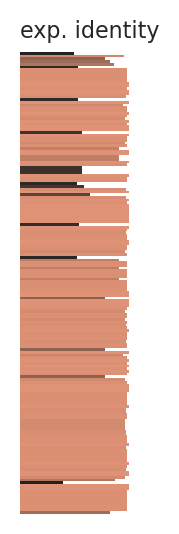

In [24]:
fig, ax = plt.subplots(figsize=(0.7, 3), dpi=200)
sns.barplot(
    x='identity', y='y',
    data=(df := pd.DataFrame({
        'identity': identity_scores,
        'y': range(num_cols)
    })),
    orient='h',
    width=1.0,
    linewidth=0,
    palette=[
        mcolors.LinearSegmentedColormap.from_list(
            "cmap",
            ["#222222",
            "#222222",
             # color.CS_FG_B,
             # tuple(v / 256 for v in (61, 160, 210)),
             # tuple(v / 256 for v in (255, 158, 119)),
             color.CS_FG_A,
             # color.CS_FG_A
             ]
        )(score)
        for score in df['identity']
    ],
    legend=False,
    ax=ax
)
ax.text(0, 1.02, 'exp. identity', transform=ax.transAxes, ha='left', va='bottom', fontsize=8)
plt.grid(False)
plt.xlim((0, 1))
plt.axis('off')
plt.gca().invert_yaxis()

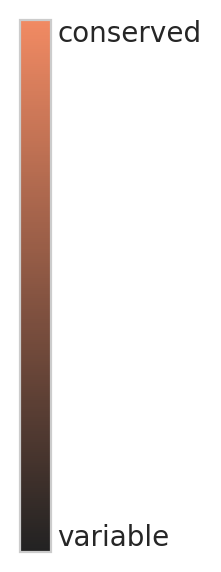

In [9]:
# import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(0.2, 7), dpi=200)
fig.subplots_adjust(bottom=0.5)

cmap = mcolors.LinearSegmentedColormap.from_list(
    "ramachandran_cmap", 
    ["#222222", 
     # color.CS_FG_B,
     # "white", 
     color.CS_FG_A]
)
norm = mpl.colors.Normalize(vmin=0, vmax=9)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='vertical')
cb.set_ticks([])
cb.ax.text(1.2, 0, 'variable', transform=cb.ax.transAxes, ha='left', va='bottom', fontsize=10)
cb.ax.text(1.2, 1, 'conserved', transform=cb.ax.transAxes, ha='left', va='top', fontsize=10)
plt.show()